# Template of  jupyter notebook for analysis of SAXS/WAXS/GiSAXS/GiWAXS

## Load package

In [1]:
%matplotlib notebook
from pyScatt.packages import *
plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams.update({ 'image.origin': 'lower'   })
plt.rcParams.update({ 'image.interpolation': 'none'   })
T = True
F = False

## Define IO

In [2]:
inDir =  '/home/group/NSLSII_Data/SMI/2021_Cycle3/Results/SYang/ExampleData/1M/'
print('The input dir is: %s'%inDir)


The input dir is: /home/group/NSLSII_Data/SMI/2021_Cycle3/Results/SYang/ExampleData/1M/


In [3]:
outDir = '/home/group/NSLSII_Data/SMI/2021_Cycle3/Results/SYang/'
#outDir = '/home/yuzhang/Results/'
outDir = create_fullpath(  outDir )
outDir_HDF =  create_dir(  'HDF_Results/', outDir )
outDir_PDF =  create_dir(  'PDF_Report/', outDir )

Directory  /home/group/NSLSII_Data/SMI/2021_Cycle3/Results/SYang/  already exists
Directory  /home/group/NSLSII_Data/SMI/2021_Cycle3/Results/SYang/HDF_Results/  already exists
Directory  /home/group/NSLSII_Data/SMI/2021_Cycle3/Results/SYang/PDF_Report/  already exists


## Organize Data 
* the sorting method heavly relies on data acquisition strategy
* Currently, there is no general method for sorting

In [4]:
username = 'SYang'
username_short = 'SYang'
username_short = ''
#flist = ls_dir( inDir, and_list=[  'det3000'  ],or_list=[  '' ], no_list=[ 'test'  ])
flist = ls_dir( inDir, and_list=[  'det5000'  ],or_list=[  '' ], no_list=[ 'deg'  ])
_, flists = sort_fnlist( flist,  cut_beg = -24, cut_end=-9, method = 'cut_from_end' ) #for waxs

#flists_clean = drop_xyz_float_filenames( flists, pattern_characters = ['_x', '_y', '_z', '_w' ] )
flists_clean = drop_xyz_float_filenames( flists, pattern_characters = ['_x', '_y', '_d'  ] )

Nf = len( flists)
print('There are %s files for user: %s in this run.'%(Nf, username_short ))

There are 1 files for user:  in this run.


In [5]:
flist

array(['SSY_Pt-Fe3O4_3_t_3786.4_uvt_3816.4_x-2003.53_y3149.81_z-603.70_det5000.00m_expt1.1s_sid00004466_000001_SAXS.tif'],
      dtype='<U111')

In [6]:
flists_clean

array(['SSY_Pt-Fe3O4_3_t_3786.4_uvt_3816.4_x-2003.53_y3149.81_z-603.70_det5000.00m_expt1.1s_sid00004466_000001_SAXS.tif'],
      dtype='<U111')

### Using a layered dict to sort the files 

In [7]:
cut_pattern= r'(_x)'
#cut_pattern= r'[0-9][_][a-zA-Z]'
#cut_pattern= r'[_][a-zA-Z]'
#cut_pattern= r''

sam_dict, sams = get_Unique_SamDict_from_list( flists, sam_list_clean=flists_clean, 
                                               cut_pattern= cut_pattern, starting_point=  12, verbose= F    )   
#ks =  sorted(list(sams.keys()))
ks =   list(sams.keys()) 
N = len(ks)
print( 'There are %s samples.'%(N))

There are 1 samples.


In [8]:
sams

{'SSY_Pt-Fe3O4_3_t_3786.4_uvt_3816.4': 1}

In [9]:
ks[0] #, sam_dict[ks[0]]

'SSY_Pt-Fe3O4_3_t_3786.4_uvt_3816.4'

##  Load Mask if has one

<IPython.core.display.Javascript object>


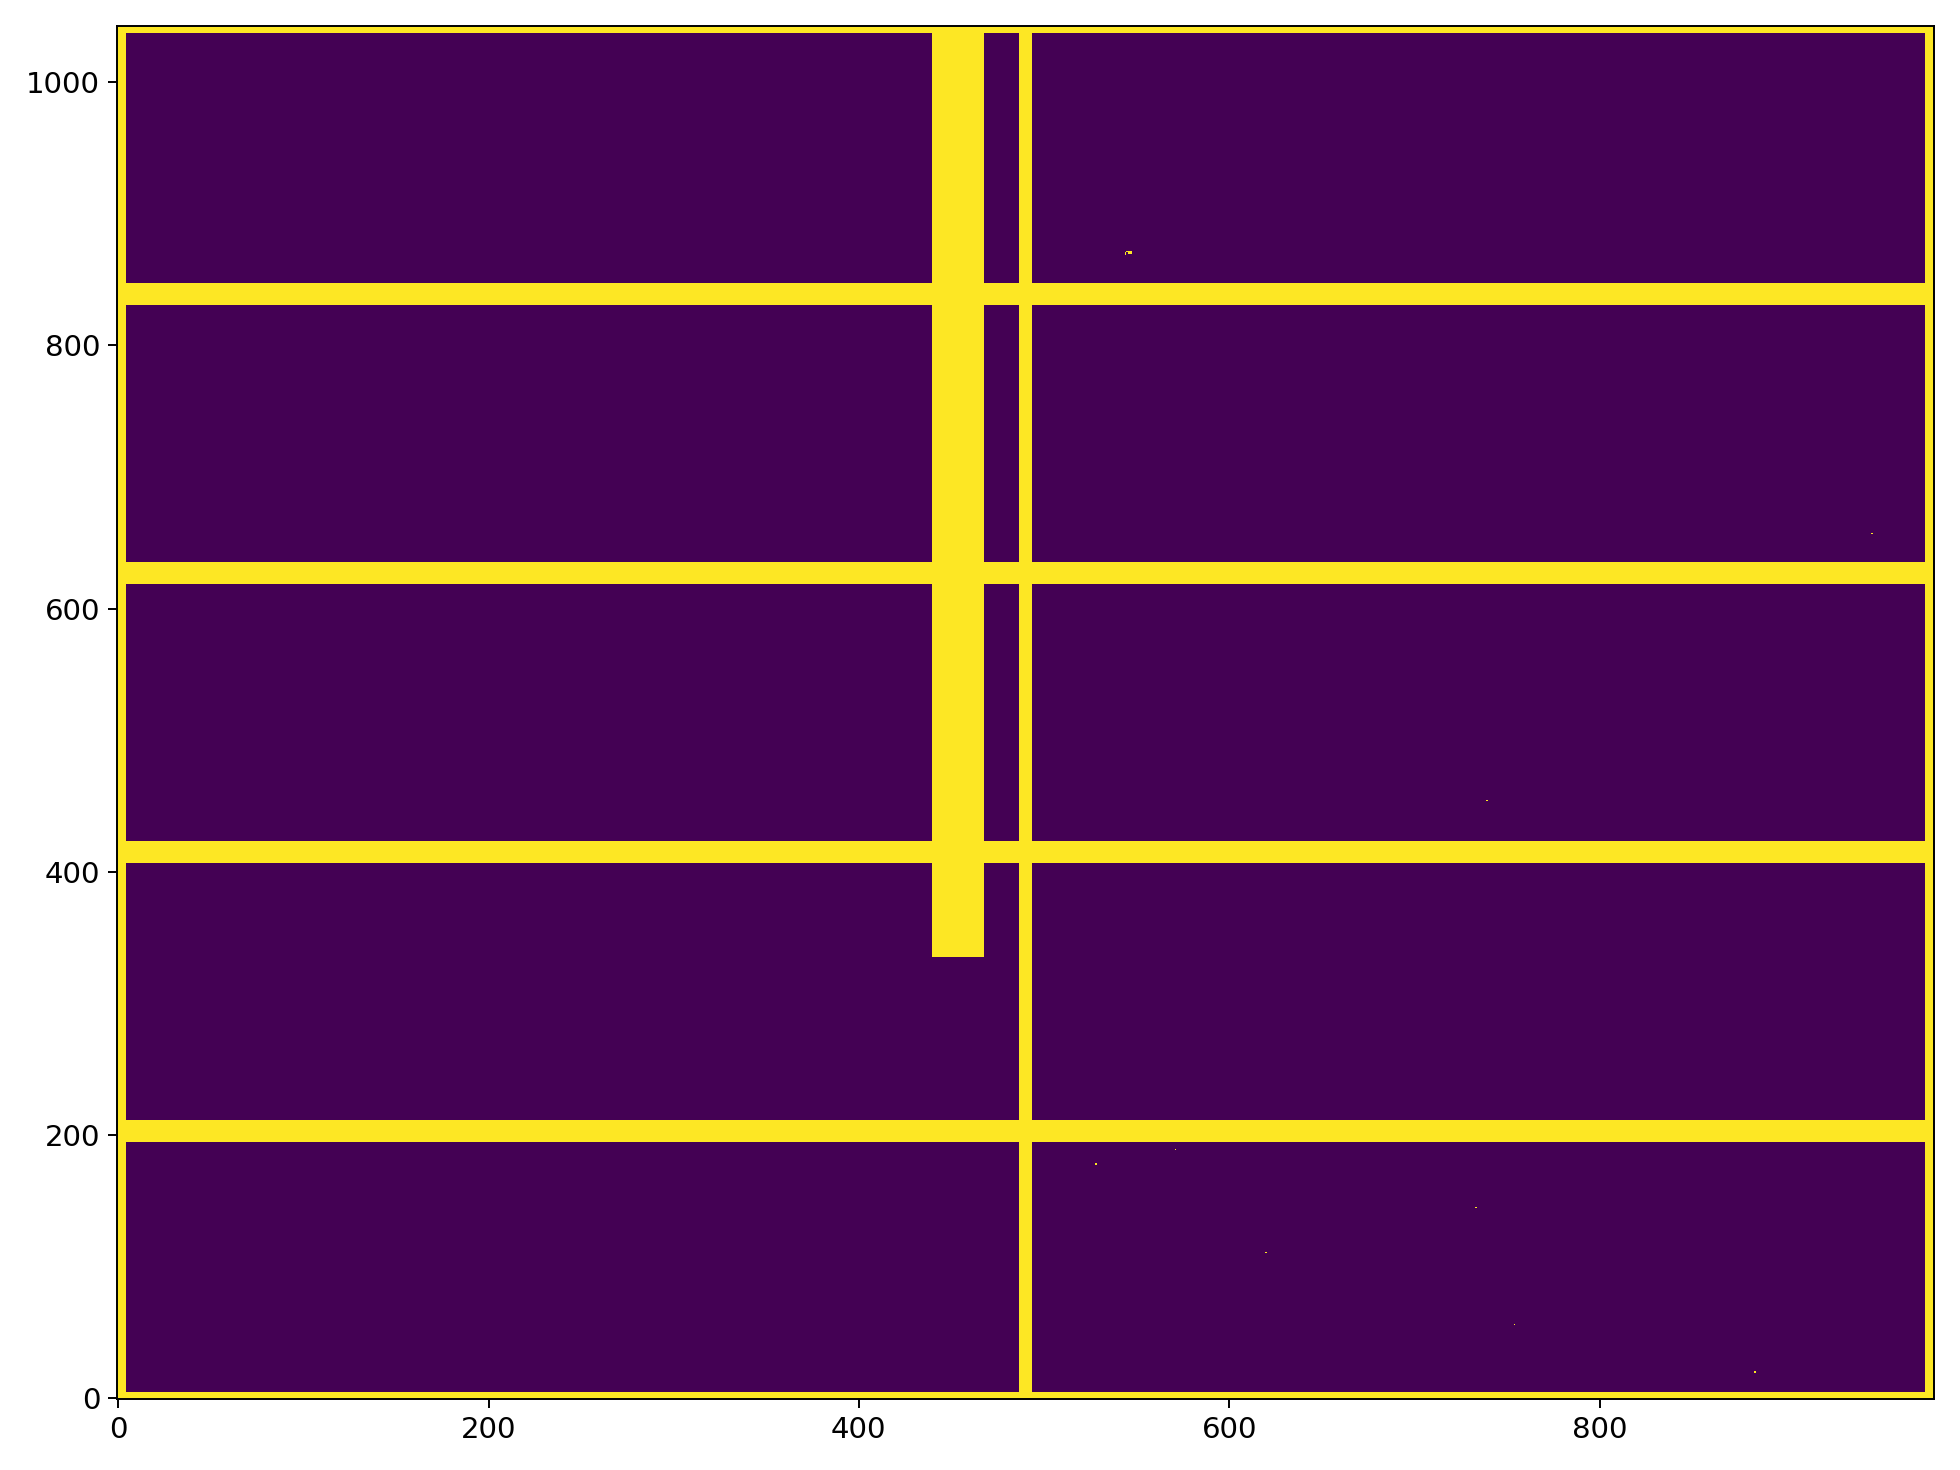

In [10]:
mask  =np.load( '/home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle3/Mask/mask_saxs_2021_C3_Nov5000.npy')
show_img(mask)
#mask = None

## Define data analysis parameters and methods

### A SAXS

In [11]:
beamline = 'SMI'
cycle='2021_C3'

#geometry   =  'Reflection'
geometry   = 'Transmission'
wav_m = 1E-10 * (12.398/16.1)

##5 m
b_xy =   [454, 682]
bs_xy = [ 454, 336 ]
sdd_mm = 5000 


incident_angle = 0
det_str = 'Pilatus1m'
hotpixel_thres = 1e6
  
pargs_sc = dict( wav_m = wav_m, 
                sdd_mm = sdd_mm, 
                b_xy =b_xy, 
                bs_xy = bs_xy, 
                incident_angle = incident_angle,             
                det_str = det_str, 
                bs_kind = 'pindiode', #None, 
                useqx = True,
                geometry =  geometry,                
                username = username, 
                cycle =  cycle, 
                beamline = beamline, 
                outDir = outDir, )
              # mask = mask )    

## Setup the class
SC = SMI_Scattering( pargs_sc  )
#SC.set_rotation_angles( rot_angle  ) 


### Methods

In [12]:
do_plot = T #True 
#do_inpait = True, make it True, the circular average does not use inpaited data 
do_show_plot = T
save_raw = F
do_qimg = F
do_ciravg = F
save_raw= F
check_stitch = F
do_stitch = F
do_Qciravg = F
show_Qciravg_roi = F 
do_Qciravg_sector = F   
show_Qciravg_sector = F 
do_Qqphi = F 
do_q_qphi = F
do_p_qphi = F    


if T:    
    ###########################
    #for SAXS
    ########################### 
    save_raw= T #F
    do_qimg = T #T
    do_plot_raw = T # True
    do_ciravg = T #False  #True  
    do_ciravg_sector = F #False  #True
    #for the angle range, the v-up is ~0, l-left, ~90;  v-down ~ 180/-180; h-right -90, 
    ciravg_sector_angle_wid = 20 
    ciravg_sector_angles = [  0, 90, 180, -90   ]
    show_ciravg_sector = F    
    do_qphi = T 
    do_q_qphi = F
    do_p_qphi = F
    

    
    
    

In [13]:
#sample_list = ks[ :1   ]
sample_list = ks   #use a dummy papemill to run this
print( sample_list, sam_dict[sample_list[0]]  )

['SSY_Pt-Fe3O4_3_t_3786.4_uvt_3816.4'] ['SSY_Pt-Fe3O4_3_t_3786.4_uvt_3816.4_x-2003.53_y3149.81_z-603.70_det5000.00m_expt1.1s_sid00004466_000001_SAXS.tif']


In [14]:
#plt.ioff()  #Turn off the plots
#plt.ion()  #Turn on the plots

The sample is: SSY_Pt-Fe3O4_3_t_3786.4_uvt_3816.4.
The filelist for this sample is: ['SSY_Pt-Fe3O4_3_t_3786.4_uvt_3816.4_x-2003.53_y3149.81_z-603.70_det5000.00m_expt1.1s_sid00004466_000001_SAXS.tif'].
Directory  /home/group/NSLSII_Data/SMI/2021_Cycle3/Results/SYang/SAXS/  already exists


<IPython.core.display.Javascript object>


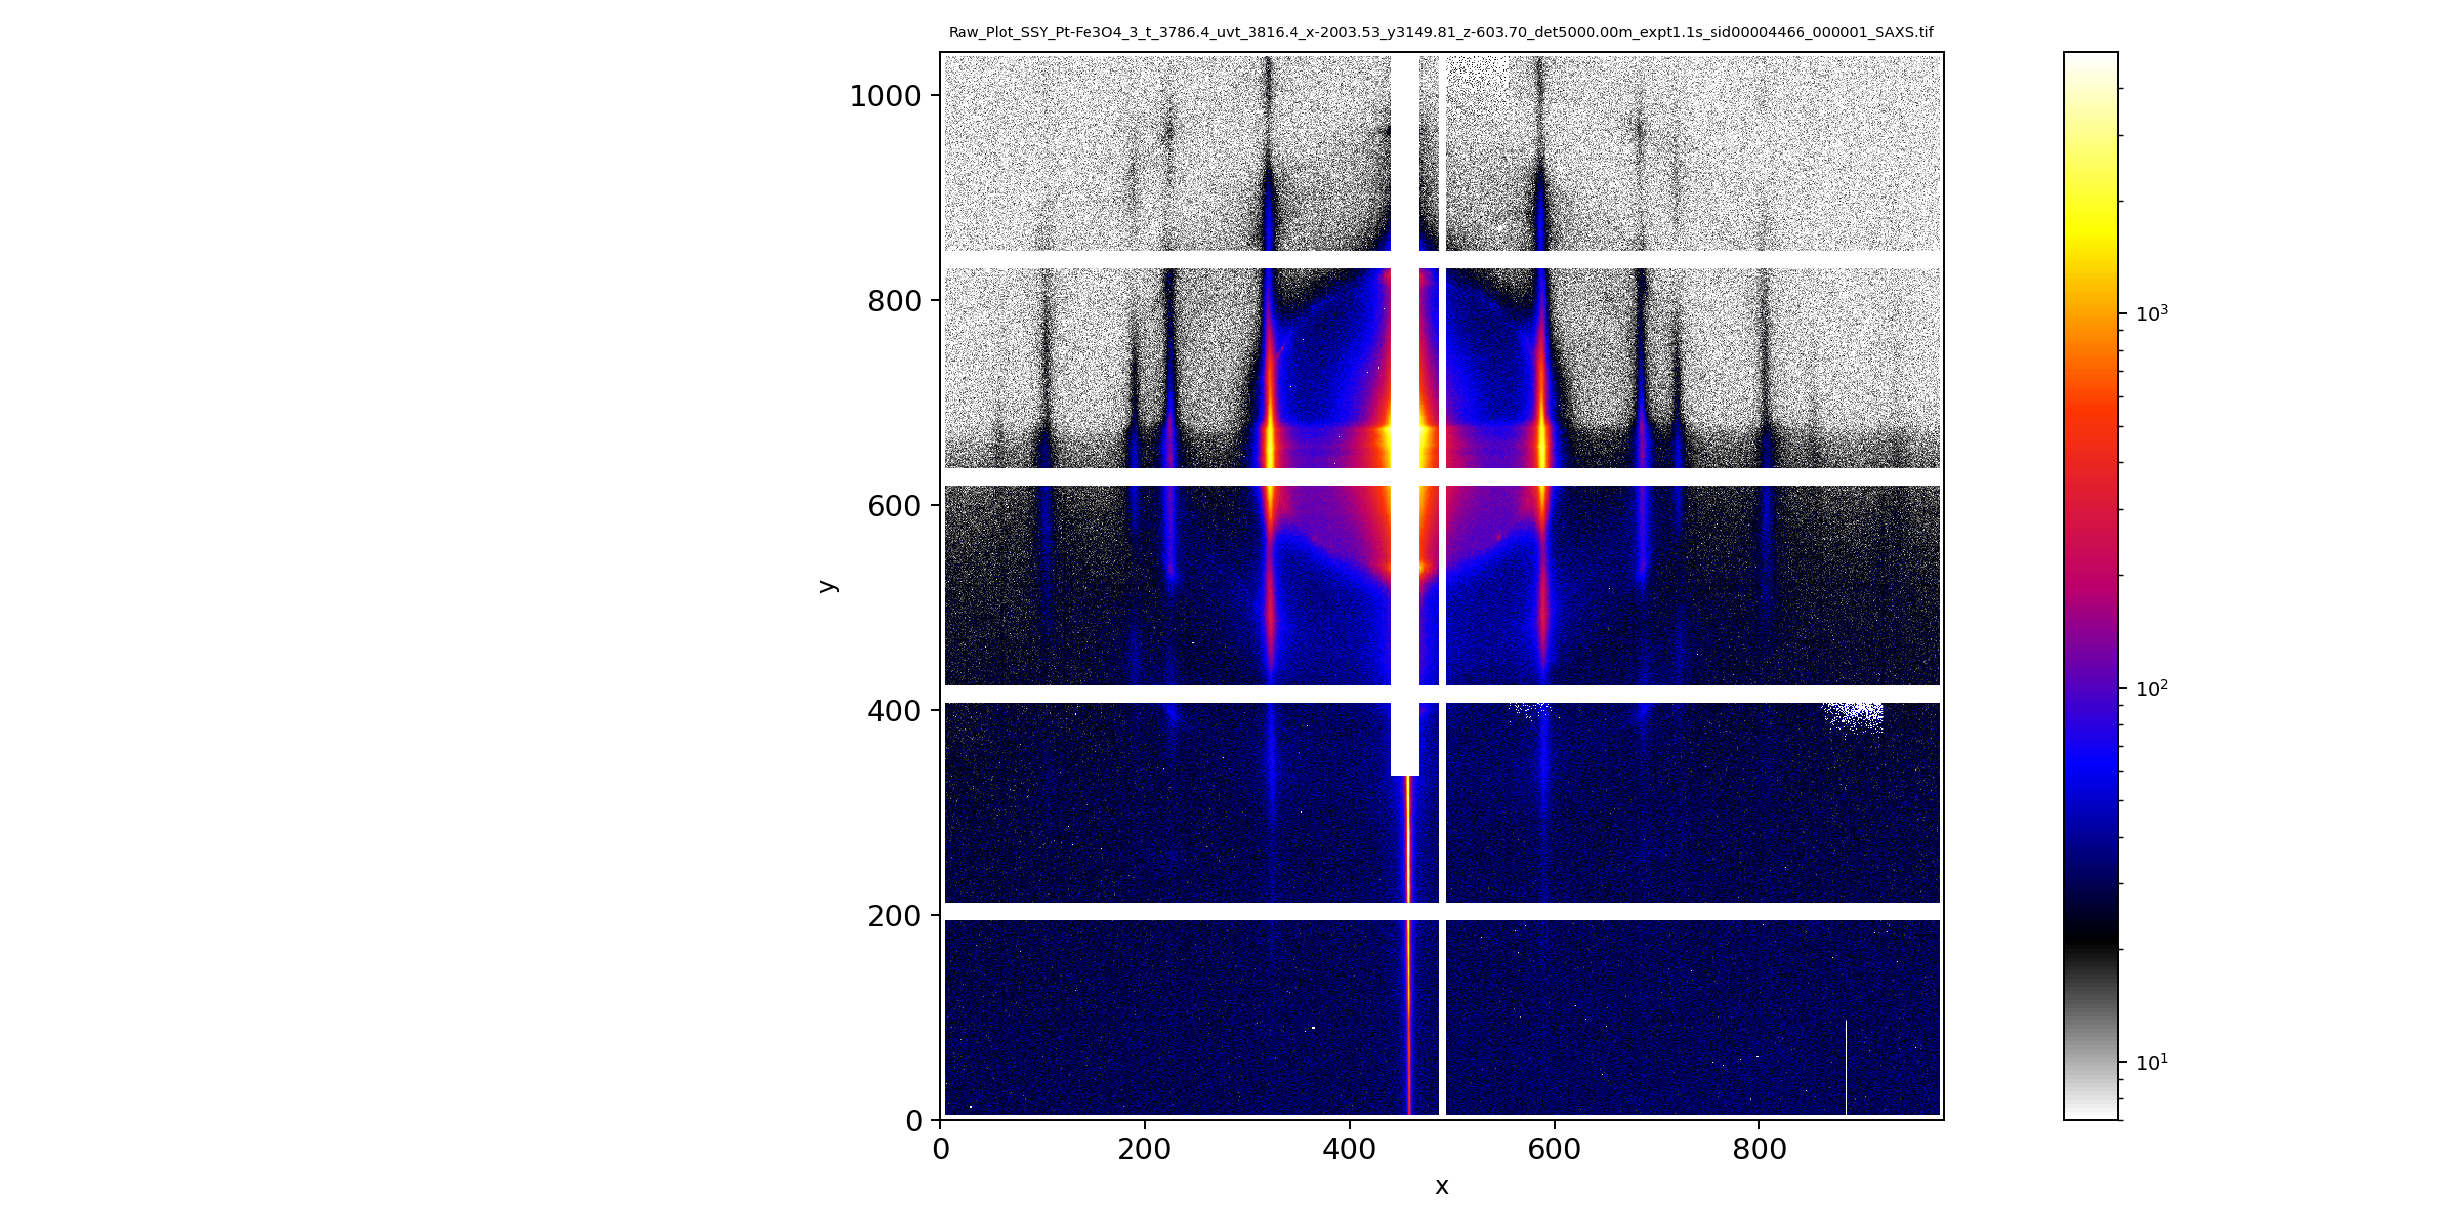

/home/group/Software/pyScatt/pyScatt/plots.py:93: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes.append( fig.add_subplot(H,V,i+1)    )


<IPython.core.display.Javascript object>


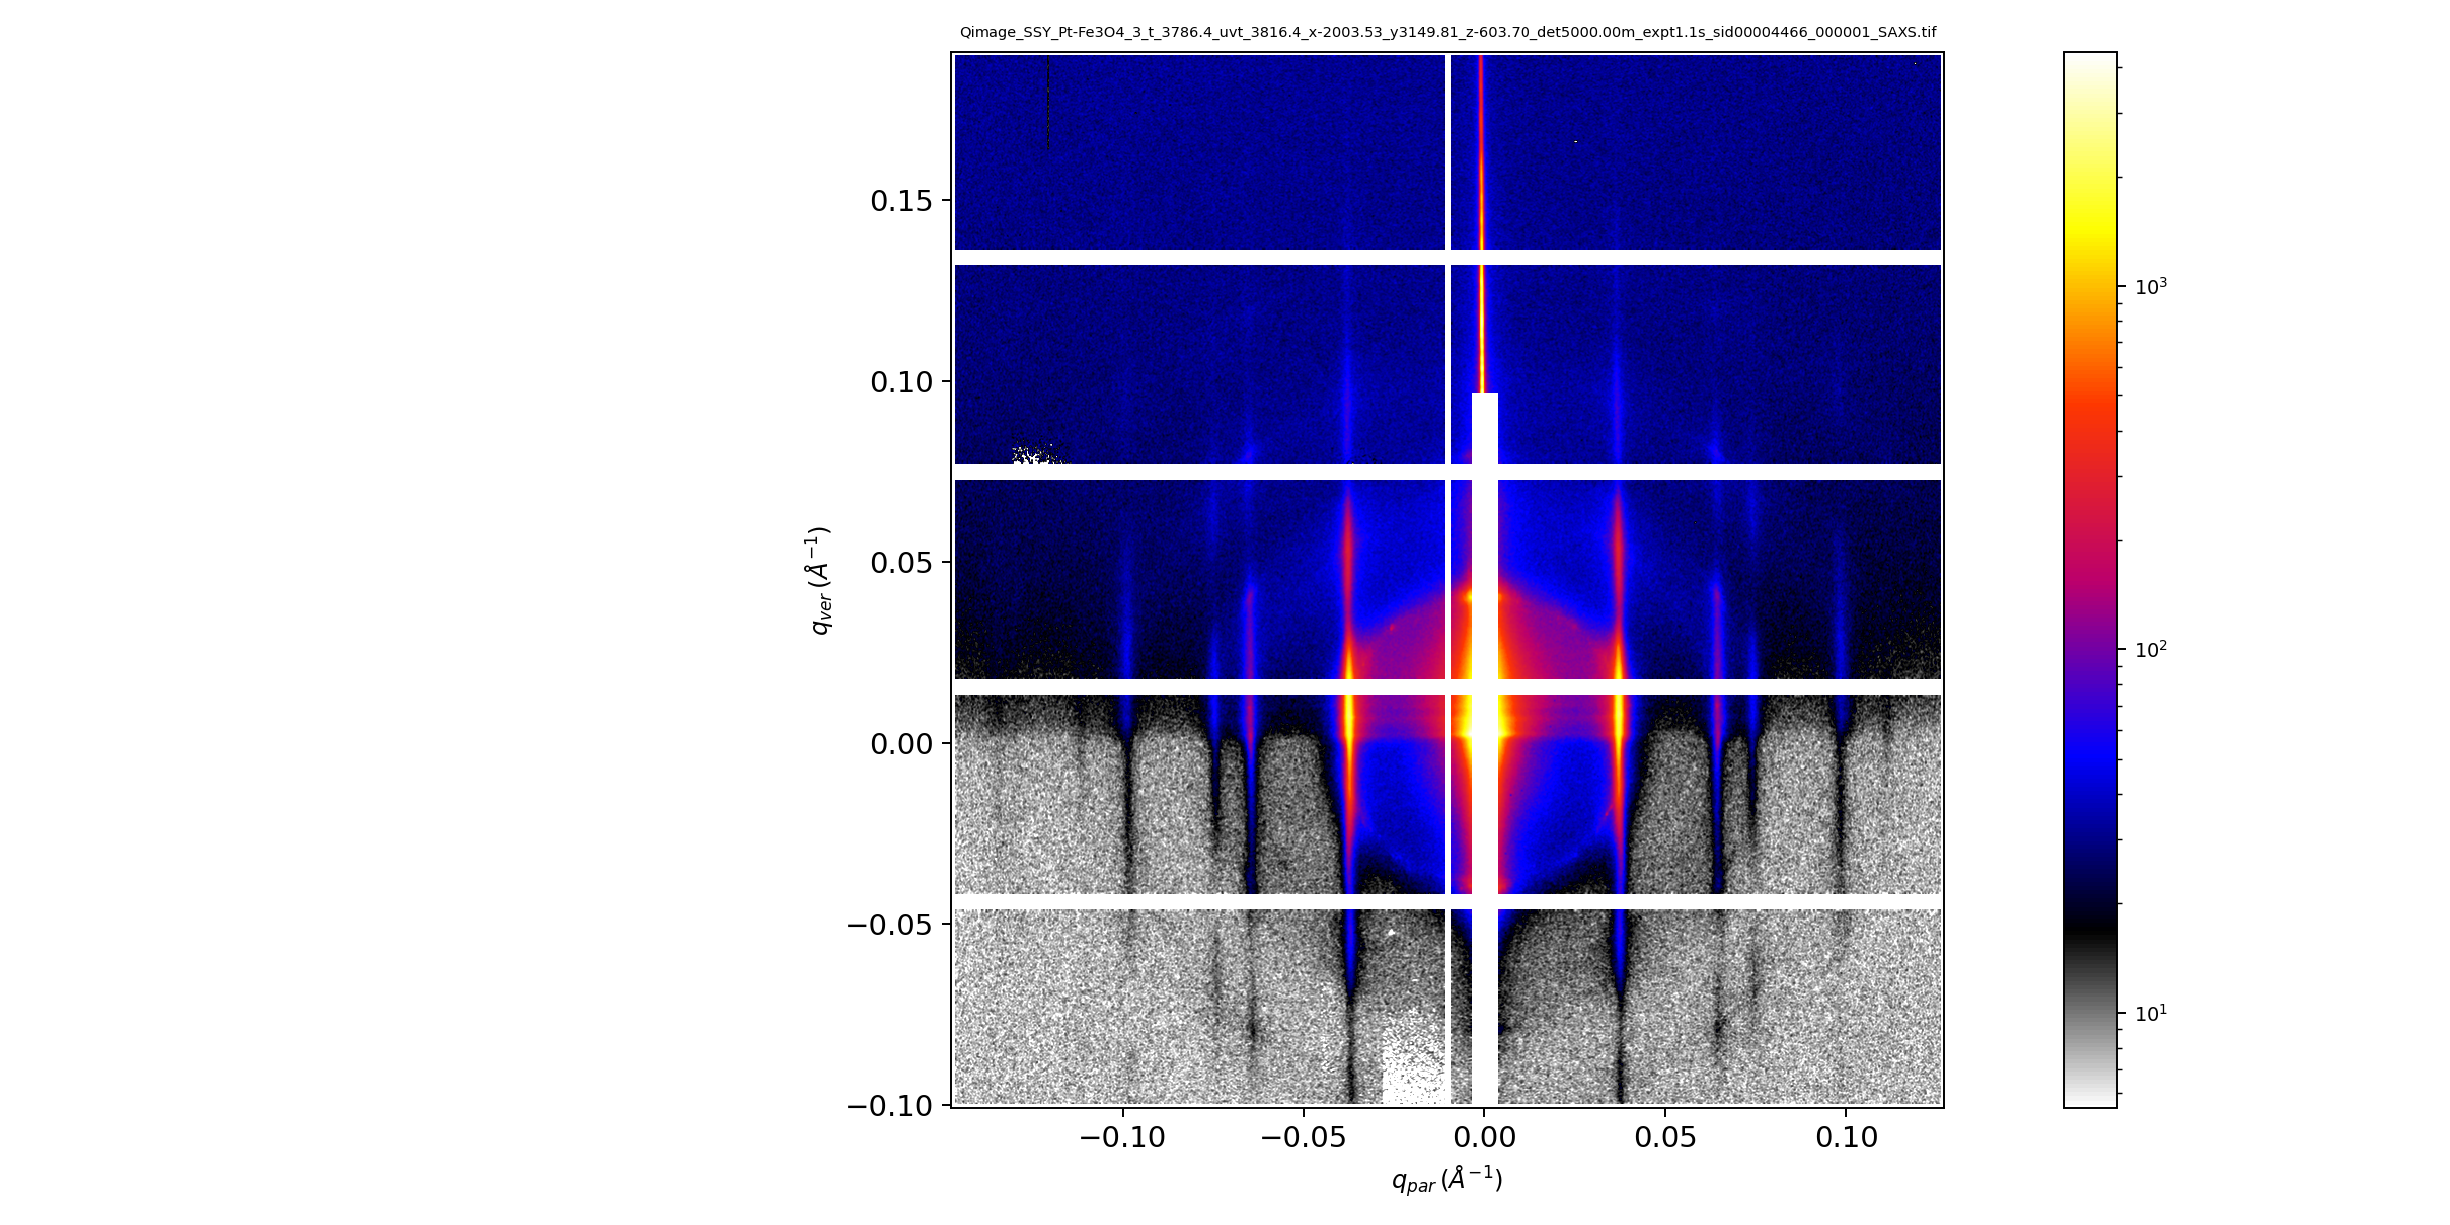

The file: Cir_Avg_SSY_Pt-Fe3O4_3_t_3786.4_uvt_3816.4_x-2003.53_y3149.81_z-603.70_det5000.00m_expt1.1s_sid00004466_000001_SAXS.tif.csv is saved in /home/group/NSLSII_Data/SMI/2021_Cycle3/Results/SYang/SAXS/Cir_Avg/


<IPython.core.display.Javascript object>


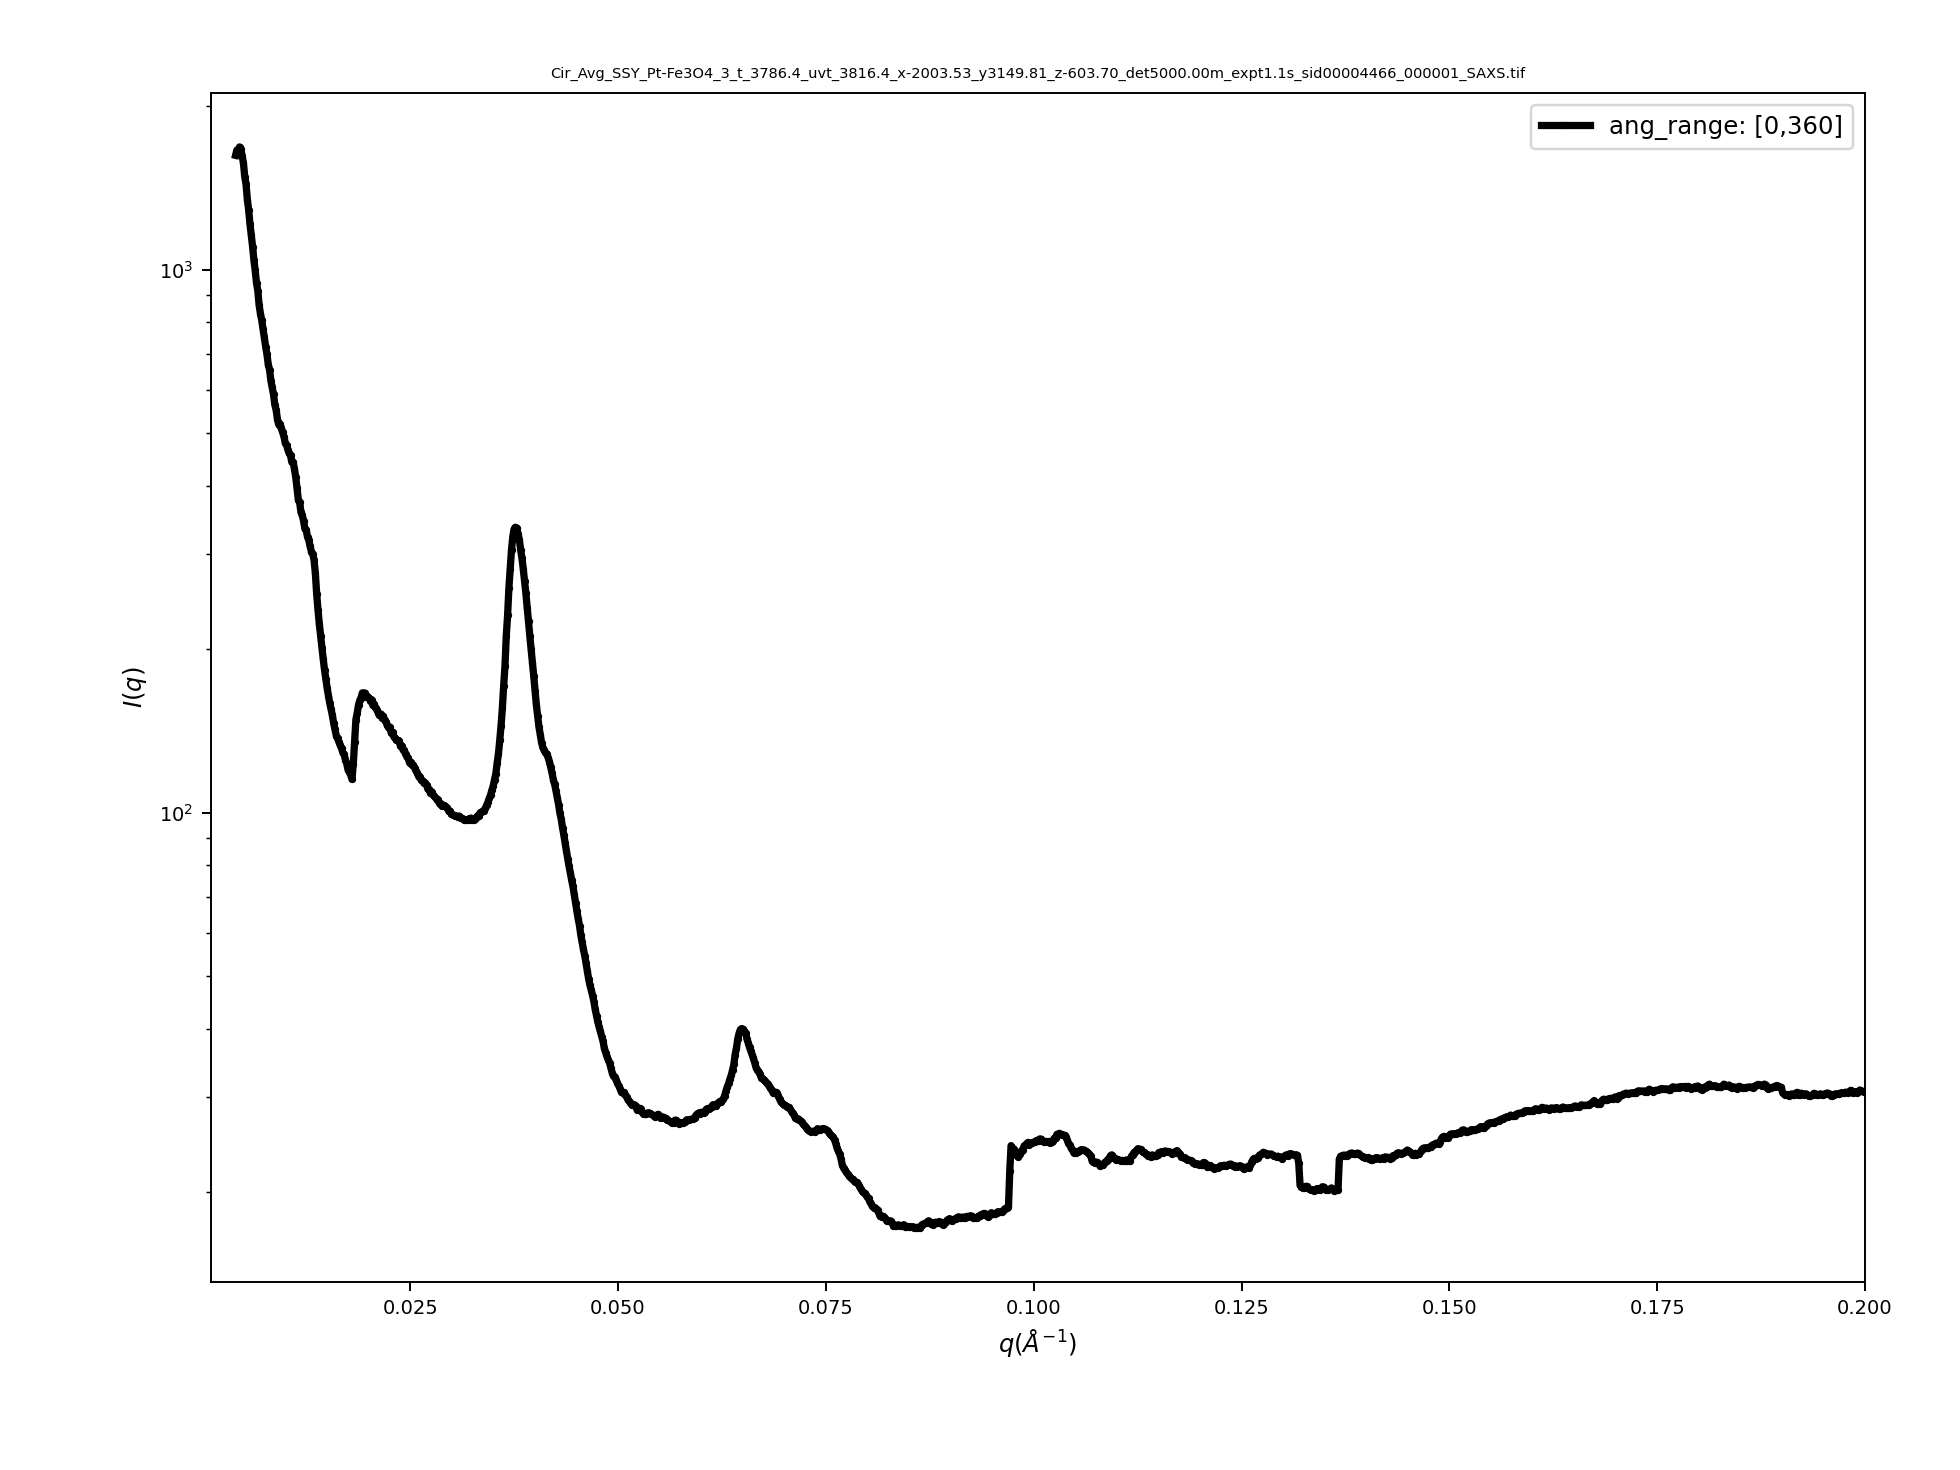

ylim is: None.


<IPython.core.display.Javascript object>


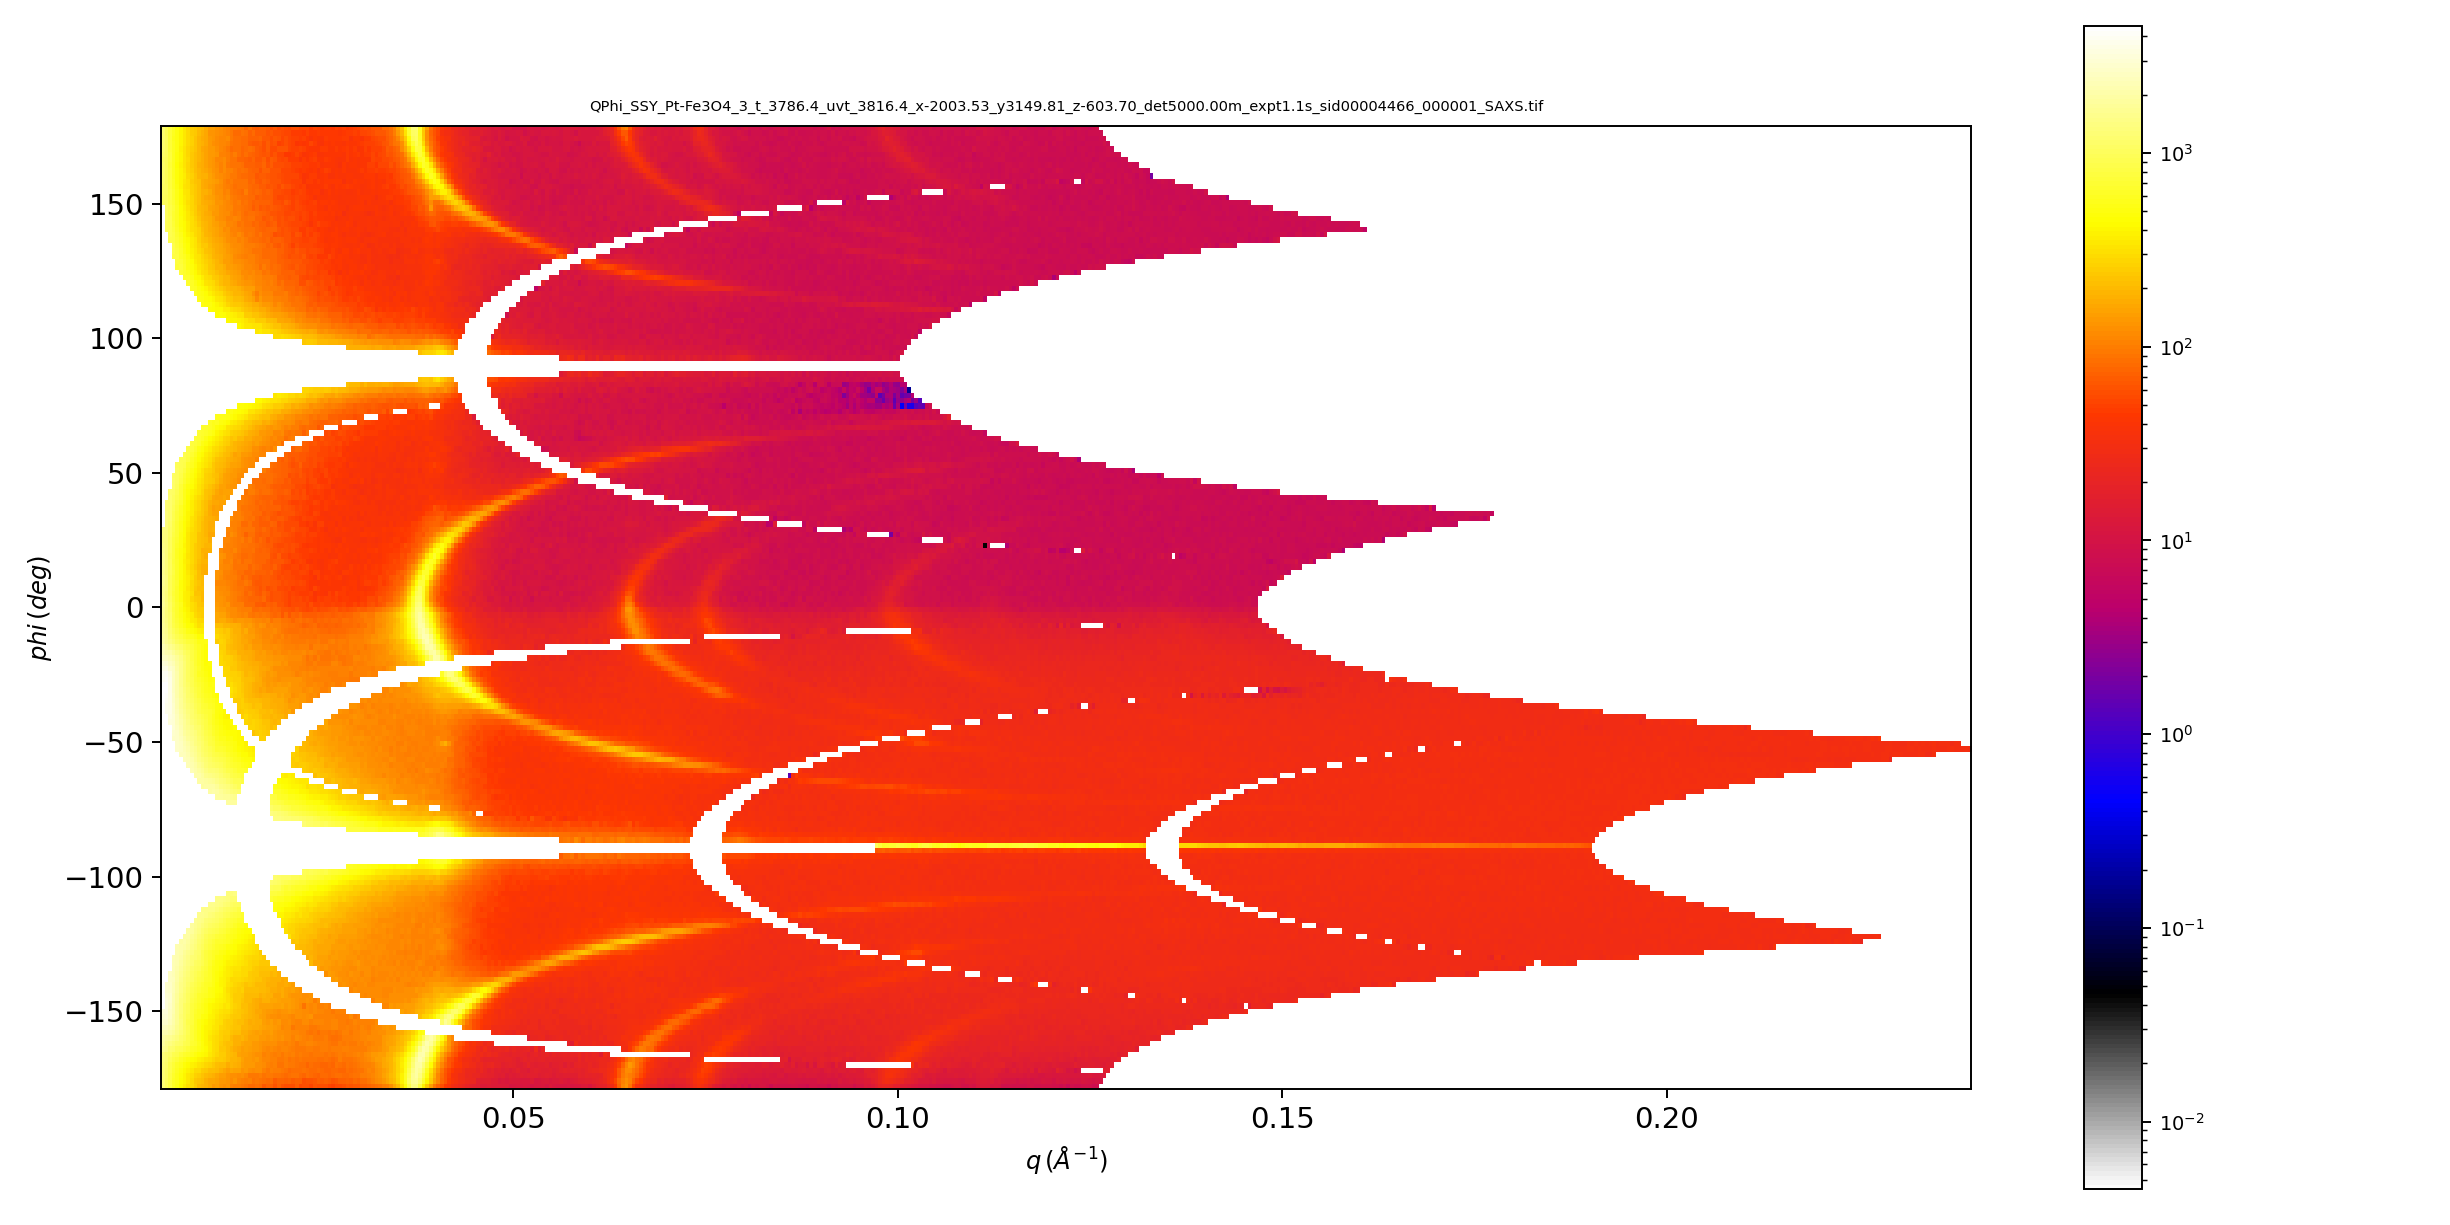

/home/group/Software/pyScatt/pyScatt/plots.py:93: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes.append( fig.add_subplot(H,V,i+1)    )


Done


In [15]:
#loop samples
for sam in sample_list:     
    print( 'The sample is: %s.'%sam) 
    fps = sam_dict[sam] 
    fp = fps[0]
    print( 'The filelist for this sample is: %s.'%fps)     
    full_filenames = [ inDir +  fp for fp in fps   ]   # [:1]
    N =  len(full_filenames)        
    RES = {}
    PATH = 'SAXS'
    RES['Data'] = {}
    pargs_sc['outDir'] = create_fullpath( outDir + PATH + '/')          
    try:
        #pz = float( re.search(   r'(_z)(.*)()', sam ).group()[2:]  )
        pz = float( re.search(   r'(_z)(.*)()', fp ).group()[2:]  )
    except:
        #pz = 1400
        pz = 0
    pargs_sc['sdd_mm'] = sdd_mm  - pz/1000. 
    
    SC = SMI_Scattering( pargs_sc  ) 
    SC.md['sample'] = sam
    SC.load_data( full_filenames )   
    SC.saved_plots, SC.saved_data  = {}, {}   
    for i in range(N):
        res = {}
        #######################################
        #plot the raw data
        ########################################
        if do_plot_raw:
            run_plot_raw( SC, ki=i,  vmin= None, vmax=None,mask=~mask, fontsize=6, )  
        #######################################
        #Do conversion to q-space
        ########################################              
        if do_qimg:
            qimg, qx, qz = SC.img_to_qimg( img = SC.imgs[i], bins=None,mask= mask, x='Qtx', y='Qty', method = 'ai'  )            
            run_save_qimage(  SC, ki=i  )  
            run_plot_qimage(  SC, ki=i , zlim=[0.1,1] )  
            SC.qmask = ~SC.qimg_mask               
            
        #######################################
        #Do circular average
        ########################################  
        if do_ciravg: 
            q_ca,iq_ca = SC.img_circular_average(img=SC.imgs[i],Qrange=None,Prange=None,
                                                     bins=1500,method='ai',mask=mask)
            run_save_ciravg(  SC, ki=i  )  
            peaks = None 
            xlim=[0.001,0.2]
            #xlim=[0.001, .5 ]
            
            run_plot_ciravg( SC, ki =i, peaks = peaks,xlim=xlim, ylim=None,fontsize=6, )             
        #######################################
        #Do sector circular average
        ########################################  
        if do_ciravg_sector:  
            Prange =   [ [w-ciravg_sector_angle_wid, w+ciravg_sector_angle_wid] for w in  ciravg_sector_angles  ]
            qiqs_cas  = SC.img_circular_average_sector( img=SC.imgs[i], 
                                        Qrange=None,Prange=Prange,bins=1500,mask= mask ) 
            run_save_ciravg_sector( SC, ki=i  )
            run_plot_ciravg_sector( SC, ki=i ) #, xlim=[0,8], ylim=[.1, 1e5]  )      
   
        #######################################
        #Do q-phi analysis
        ########################################              
        if do_qphi:  
            qphi_bins = [ 500, 180 ];Prange= None;Qrange=None;     
            q_QP, phi_QP, qphi_QP = SC.img_to_qphi(img=SC.imgs[i],Qrange=Qrange,Prange=Prange,                                                      
                                                      bins=qphi_bins,method='ai',mask=mask)
            run_save_Qqphi( SC, ki=i  )
            run_plot_Qqphi( SC, ki=i, fontsize=6, vmin= None, vmax=None, aspect= 0.00035, ) 
            if do_q_qphi:
                q_QPq,  iq_QPq = SC.qphi_to_iq( qphi_QP, q_range=q_QP, p_range=phi_QP, )
                run_save_q_iq_qphi( SC,ki=i )
                run_plot_q_iq_qphi( SC,ki=i, peaks = None, xlim= None, ylim=None,fontsize=6, )
            if do_p_qphi:  
                q_range_roi = None 
                #q_range_roi = [ 2.65-.05, 2.65 + .05 ]
                p_QPp,  ip_QPp = SC.qphi_to_ip( qphi_QP, q_range=q_QP, p_range=phi_QP, Qrange=q_range_roi ) 
                run_save_p_ip_qphi( SC,ki=i )
                run_plot_p_ip_qphi( SC,ki=i, peaks = None, xlim= None, ylim=None,fontsize=6, )   
    
        #####################
        ## save data to h5 file 
        res = SC.res_to_dict(  save_raw=save_raw, do_stitch=do_stitch, 
                 do_ciravg = do_ciravg, do_ciravg_sector = do_ciravg_sector,
                 do_qimg=do_qimg, do_qphi = do_qphi,  
                 do_q_qphi = do_q_qphi, do_p_qphi = do_p_qphi,                         
                        )             
    RES['Data'][ SC.md['filenames'][i] ] = res              
    K='saved_data';SC.md[K] = SC.saved_data
    K='saved_plots';SC.md[K] = SC.saved_plots    
    RES['md']= SC.md      
    dicttoh5( RES, os.path.join(outDir_HDF, '%s.h5'%sam),
                     h5path='/%s/'%PATH, mode='a', overwrite_data=True) 
    
print('Done') 
 
        

# THE END